In [1]:
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/content/drive')
from google.colab import files

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import joblib
import os

Mounted at /content/drive


Цей набір даних містить 10692 об'єкти оренди з 13 різними характеристиками:


*   **city**: місто, в якому знаходиться об'єкт;
*   **area**: площа нерухомості;
*   **area**: площа нерухомості;
*   **rooms**: кількість кімнат;
*  **bathroom**: кількість ванних кімнат;
*  **parking spaces**: кількість паркомісць;
*   **floor**: поверх;
*   **animals**: дозвіл на проживання з тваринами;
*   **furniture**: меблі;

*   **hoa (R$)** : податок на асоціацію власників будинків;

*   **rent amount (R$)**:  сума орендної плати;

*   **property tax**: податок на муніципальну власність;
*   **fire insurance (R$)**: вартість страхування від пожежі;

*   **total (R$)**: загальна сума всіх значень.

In [2]:
file_path = '/content/drive/My Drive/Colab Notebooks/Colab/Rent Brazil/rent.csv'
df = pd.read_csv(file_path)

df

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10687,Porto Alegre,63,2,1,1,5,not acept,furnished,402,1478,24,22,1926
10688,São Paulo,285,4,4,4,17,acept,not furnished,3100,15000,973,191,19260
10689,Rio de Janeiro,70,3,3,0,8,not acept,furnished,980,6000,332,78,7390
10690,Rio de Janeiro,120,2,2,2,8,acept,furnished,1585,12000,279,155,14020


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   city                 10692 non-null  object
 1   area                 10692 non-null  int64 
 2   rooms                10692 non-null  int64 
 3   bathroom             10692 non-null  int64 
 4   parking spaces       10692 non-null  int64 
 5   floor                10692 non-null  object
 6   animal               10692 non-null  object
 7   furniture            10692 non-null  object
 8   hoa (R$)             10692 non-null  int64 
 9   rent amount (R$)     10692 non-null  int64 
 10  property tax (R$)    10692 non-null  int64 
 11  fire insurance (R$)  10692 non-null  int64 
 12  total (R$)           10692 non-null  int64 
dtypes: int64(9), object(4)
memory usage: 1.1+ MB


In [4]:
df.isnull().sum()

,0
city,0
area,0
rooms,0
bathroom,0
parking spaces,0
floor,0
animal,0
furniture,0
hoa (R$),0
rent amount (R$),0


In [5]:
df.shape

(10692, 13)

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
area,10692.0,149.217920,537.016942,11.0,56.00,90.0,182.0,46335.0
rooms,10692.0,2.506079,1.171266,1.0,2.00,2.0,3.0,13.0
bathroom,10692.0,2.236813,1.407198,1.0,1.00,2.0,3.0,10.0
parking spaces,10692.0,1.609147,1.589521,0.0,0.00,1.0,2.0,12.0
hoa (R$),10692.0,1174.021698,15592.305248,0.0,170.00,560.0,1237.5,1117000.0
rent amount (R$),10692.0,3896.247194,3408.545518,450.0,1530.00,2661.0,5000.0,45000.0
property tax (R$),10692.0,366.704358,3107.832321,0.0,38.00,125.0,375.0,313700.0
fire insurance (R$),10692.0,53.300879,47.768031,3.0,21.00,36.0,68.0,677.0
total (R$),10692.0,5490.487000,16484.725912,499.0,2061.75,3581.5,6768.0,1120000.0


In [7]:
 df.duplicated().sum()

358

In [8]:
df = df.drop_duplicates()

In [9]:
df.shape

(10334, 13)

In [10]:
df = df.drop(['total (R$)'], axis=1)
df

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11
...,...,...,...,...,...,...,...,...,...,...,...,...
10687,Porto Alegre,63,2,1,1,5,not acept,furnished,402,1478,24,22
10688,São Paulo,285,4,4,4,17,acept,not furnished,3100,15000,973,191
10689,Rio de Janeiro,70,3,3,0,8,not acept,furnished,980,6000,332,78
10690,Rio de Janeiro,120,2,2,2,8,acept,furnished,1585,12000,279,155


In [11]:
df = df.rename(columns={"bathroom": "bathrooms", "hoa (R$)": "hoa", "rent amount (R$)": "rent amount",  'property tax (R$)': 'property tax', 'fire insurance (R$)': 'fire insurance' }, errors="raise")
df

,city,area,rooms,bathrooms,parking spaces,floor,animal,furniture,hoa,rent amount,property tax,fire insurance
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11
...,...,...,...,...,...,...,...,...,...,...,...,...
10687,Porto Alegre,63,2,1,1,5,not acept,furnished,402,1478,24,22
10688,São Paulo,285,4,4,4,17,acept,not furnished,3100,15000,973,191
10689,Rio de Janeiro,70,3,3,0,8,not acept,furnished,980,6000,332,78
10690,Rio de Janeiro,120,2,2,2,8,acept,furnished,1585,12000,279,155


# **Вартість оренди житла залежно від кількості кімнат**

In [12]:
df['rooms'].describe()

,rooms
count,10334.000000
mean,2.539965
std,1.168185
min,1.000000
25%,2.000000
50%,3.000000
75%,3.000000
max,13.000000


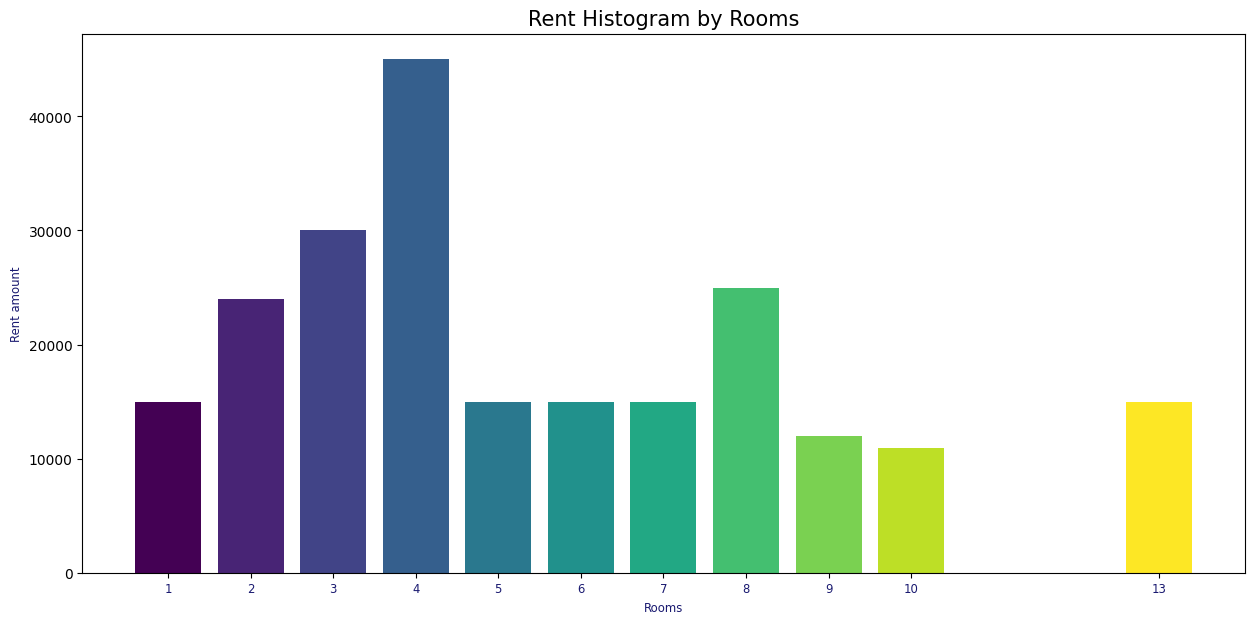

In [13]:
unique_rooms = sorted(df['rooms'].unique())

colors = plt.cm.viridis(np.linspace(0, 1, len(unique_rooms)))

color_map = dict(zip(unique_rooms, colors))

plt.figure(figsize=(15, 7))

plt.bar(
    df['rooms'],
    df['rent amount'],
    color=[color_map[room] for room in df['rooms']]
)

plt.xticks(unique_rooms, labels=unique_rooms, fontsize="small", rotation=0, color="midnightblue")

plt.xlabel("Rooms", fontsize="small", color="midnightblue")
plt.ylabel("Rent amount", fontsize="small", color="midnightblue")
plt.title("Rent Histogram by Rooms", fontsize=15)

plt.show()

# **Вартість оренди житла залежно від міста**

In [14]:
df['city'].unique()

array(['São Paulo', 'Porto Alegre', 'Rio de Janeiro', 'Campinas',
       'Belo Horizonte'], dtype=object)

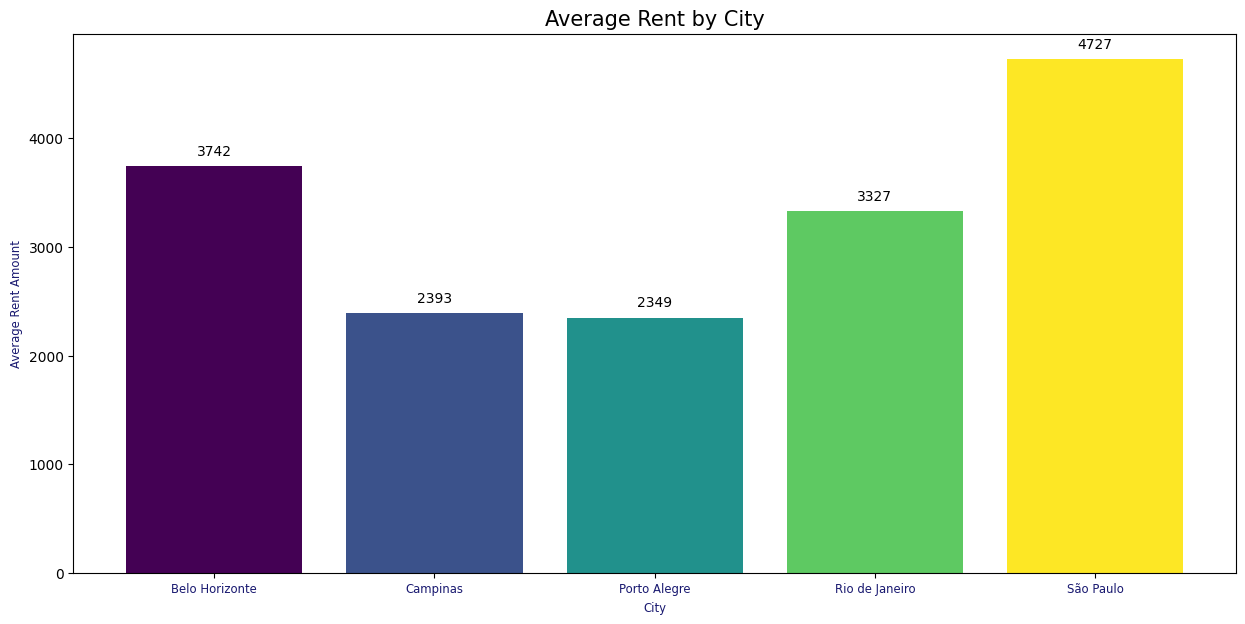

In [15]:
top_cities = df['city'].value_counts().head(5).index

filtered_df = df[df['city'].isin(top_cities)]

unique_city = sorted(filtered_df['city'].unique())

colors = plt.cm.viridis(np.linspace(0, 1, len(unique_city)))

color_map = dict(zip(unique_city, colors))

plt.figure(figsize=(15, 7))

average_rent = filtered_df.groupby('city')['rent amount'].mean()

bars = plt.bar(
    average_rent.index,
    average_rent.values,
    color=[color_map[city] for city in average_rent.index]
)

for bar in bars:
    yval = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        yval + 100,
        f"{yval:.0f}",
        ha='center',
        fontsize=10,
        color="black"
    )

plt.xticks(fontsize="small", rotation=0, color="midnightblue")
plt.xlabel("City", fontsize="small", color="midnightblue")
plt.ylabel("Average Rent Amount", fontsize="small", color="midnightblue")
plt.title("Average Rent by City", fontsize=15)

plt.show()

In [16]:
df['area'].describe()

,area
count,10334.000000
mean,152.439423
std,545.875595
min,11.000000
25%,59.000000
50%,95.000000
75%,190.000000
max,46335.000000


In [17]:
print(f'city', df["city"].unique())
print(f'rooms', df["rooms"].unique())
print(f'floor', df["floor"].unique())
print(f'parking spaces', df["parking spaces"].unique())
print(f'bathrooms', df["bathrooms"].unique())


city ['São Paulo' 'Porto Alegre' 'Rio de Janeiro' 'Campinas' 'Belo Horizonte']
rooms [ 2  4  1  3  7  5  8  6 10 13  9]
floor ['7' '20' '6' '2' '1' '-' '4' '3' '10' '11' '24' '9' '8' '17' '18' '5'
 '13' '15' '16' '14' '26' '12' '21' '19' '22' '27' '23' '35' '25' '46'
 '28' '29' '301' '51' '32']
parking spaces [ 1  0  7  4  2  6  3  8  5 10 12]
bathrooms [ 1  4  3  2  6  5  7  9  8 10]


In [18]:
df.head()

,city,area,rooms,bathrooms,parking spaces,floor,animal,furniture,hoa,rent amount,property tax,fire insurance
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11


In [19]:
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()

df[['animal', 'furniture', 'city']] = encoder.fit_transform(df[['animal', 'furniture', 'city']])
df

,city,area,rooms,bathrooms,parking spaces,floor,animal,furniture,hoa,rent amount,property tax,fire insurance
0,4.0,70,2,1,1,7,0.0,0.0,2065,3300,211,42
1,4.0,320,4,4,0,20,0.0,1.0,1200,4960,1750,63
2,2.0,80,1,1,1,6,0.0,1.0,1000,2800,0,41
3,2.0,51,2,1,0,2,0.0,1.0,270,1112,22,17
4,4.0,25,1,1,0,1,1.0,1.0,0,800,25,11
...,...,...,...,...,...,...,...,...,...,...,...,...
10687,2.0,63,2,1,1,5,1.0,0.0,402,1478,24,22
10688,4.0,285,4,4,4,17,0.0,1.0,3100,15000,973,191
10689,3.0,70,3,3,0,8,1.0,0.0,980,6000,332,78
10690,3.0,120,2,2,2,8,0.0,0.0,1585,12000,279,155


In [20]:
num_zeros = (df['hoa'] == 0).sum()
print(f"Кількість нульових значень у колонці 'hoa': {num_zeros}")

Кількість нульових значень у колонці 'hoa': 2289


***У деяких випадках hoa дійсно може бути відсутнім, наприклад, для об'єктів нерухомості, які не входять до складу асоціацій (наприклад, приватні будинки).***

In [21]:
total_rows = df.shape[0]  # Загальна кількість рядків
percent_zeros = (num_zeros / total_rows) * 100

print(f"Відсоток нульових значень: {percent_zeros:.2f}%")

Відсоток нульових значень: 22.15%


In [22]:
df.loc[:, 'floor'] = df["floor"].str.replace("-", "0").astype(int)

In [23]:
df.head()

,city,area,rooms,bathrooms,parking spaces,floor,animal,furniture,hoa,rent amount,property tax,fire insurance
0,4.0,70,2,1,1,7,0.0,0.0,2065,3300,211,42
1,4.0,320,4,4,0,20,0.0,1.0,1200,4960,1750,63
2,2.0,80,1,1,1,6,0.0,1.0,1000,2800,0,41
3,2.0,51,2,1,0,2,0.0,1.0,270,1112,22,17
4,4.0,25,1,1,0,1,1.0,1.0,0,800,25,11


In [24]:
print(df["city"].unique())
print(df["floor"].unique())
print(df["animal"].unique())
print(df["furniture"].unique())

[4. 2. 3. 1. 0.]
[7 20 6 2 1 0 4 3 10 11 24 9 8 17 18 5 13 15 16 14 26 12 21 19 22 27 23 35
 25 46 28 29 301 51 32]
[0. 1.]
[0. 1.]


In [25]:
corr_matrix = df.corr()
corr_matrix

,city,area,rooms,bathrooms,parking spaces,floor,animal,furniture,hoa,rent amount,property tax,fire insurance
city,1.000000,-0.011079,-0.050135,0.087097,0.046532,0.111192,0.014973,-0.111979,0.003262,0.189965,0.037836,0.149550
area,-0.011079,1.000000,0.191251,0.224388,0.191421,-0.013849,-0.038712,-0.009249,0.009085,0.178228,0.038453,0.185652
rooms,-0.050135,0.191251,1.000000,0.730469,0.611634,-0.086562,-0.165436,0.075677,0.020466,0.536632,0.073539,0.560907
bathrooms,0.087097,0.224388,0.730469,1.000000,0.693952,0.000087,-0.114685,-0.023140,0.057297,0.665625,0.108083,0.673771
parking spaces,0.046532,0.191421,0.611634,0.693952,1.000000,-0.026981,-0.124266,0.003788,0.021100,0.573997,0.097159,0.593557
floor,0.111192,-0.013849,-0.086562,0.000087,-0.026981,1.000000,0.033619,-0.115293,0.029019,0.070565,0.012016,0.009841
animal,0.014973,-0.038712,-0.165436,-0.114685,-0.124266,0.033619,1.000000,-0.081020,0.013845,-0.064576,0.004238,-0.076535
furniture,-0.111979,-0.009249,0.075677,-0.023140,0.003788,-0.115293,-0.081020,1.000000,-0.009767,-0.166975,-0.001147,-0.144082
hoa,0.003262,0.009085,0.020466,0.057297,0.021100,0.029019,0.013845,-0.009767,1.000000,0.052516,0.011267,0.042833
rent amount,0.189965,0.178228,0.536632,0.665625,0.573997,0.070565,-0.064576,-0.166975,0.052516,1.000000,0.106679,0.987203


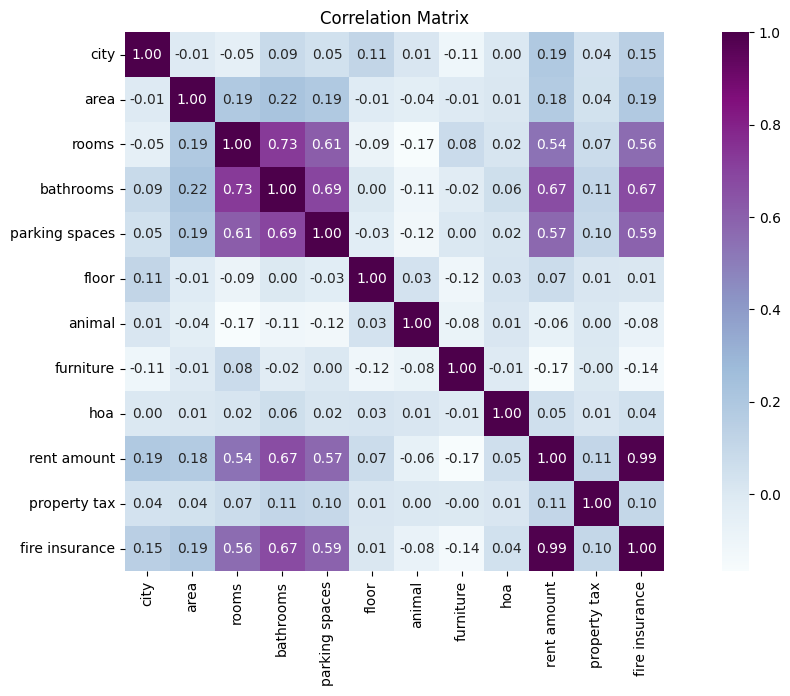

In [26]:
plt.figure(figsize=(15, 7))
plt.title("Correlation Matrix")
sns.heatmap(corr_matrix, annot=True, cmap='BuPu', fmt='.2f', square=True, cbar=True)
plt.show()

In [27]:
corr_rent_amount = corr_matrix['rent amount'].sort_values(ascending=False)
corr_rent_amount

,rent amount
rent amount,1.000000
fire insurance,0.987203
bathrooms,0.665625
parking spaces,0.573997
rooms,0.536632
city,0.189965
area,0.178228
property tax,0.106679
floor,0.070565
hoa,0.052516


<ipython-input-28-393b3bc63cc1>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr_rent_amount.values, y=corr_rent_amount.index, palette="viridis")


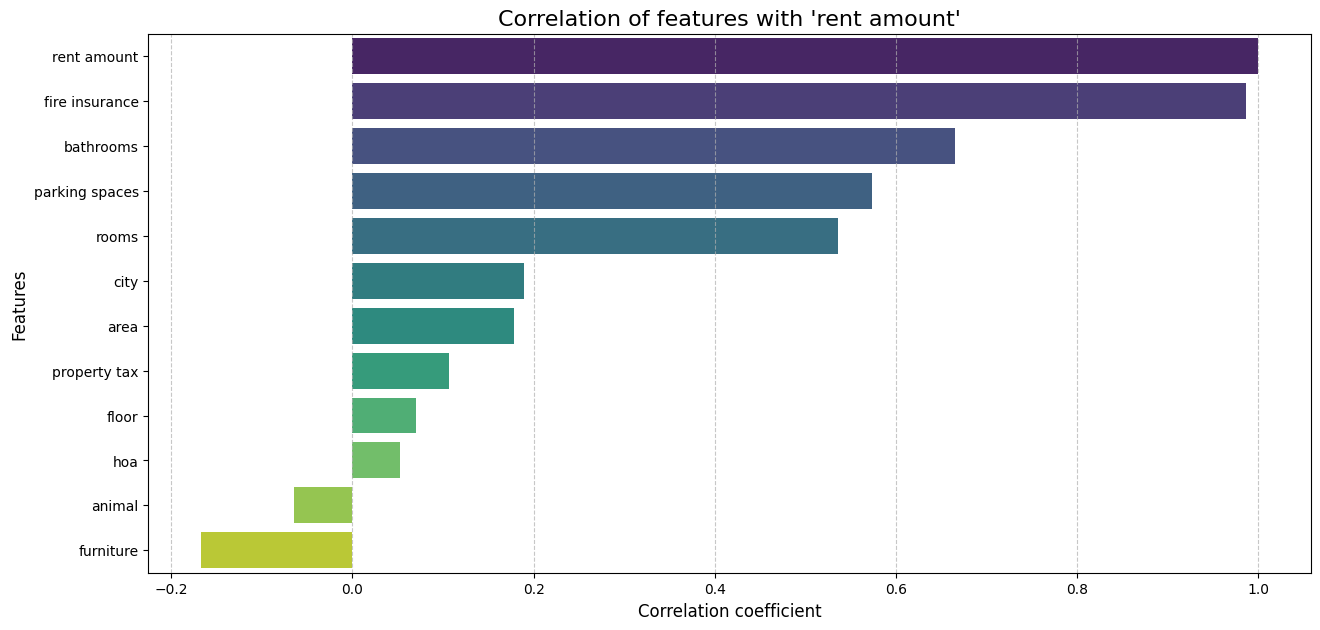

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 7))

sns.barplot(x=corr_rent_amount.values, y=corr_rent_amount.index, palette="viridis")

plt.title("Correlation of features with 'rent amount'", fontsize=16)
plt.xlabel("Correlation coefficient", fontsize=12)
plt.ylabel("Features", fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.show()

# ***Висновки з кореляційного аналізу для rent amount:***

***Сильний позитивний зв'язок***:



*   **fire insurance (0.987)**: Дуже сильна кореляція з орендною платою. Це очікувано, оскільки страхова сума може бути пропорційною орендній платі.

*  **bathrooms (0.666)**: Наявність більшої кількості ванних кімнат пов’язана з вищою орендною платою. Це вказує на те, що житлові площі з більшою кількістю зручностей дорожчі.

*  **parking spaces (0.574)**: Житло з паркомісцями має вищу орендну плату, оскільки це часто ознака елітності чи зручності.

*  **rooms (0.537)**: Більша кількість кімнат також асоціюється з вищою орендною платою, що відповідає логіці більших площ.

***Слабкий позитивний зв'язок***:

*  **city (0.190)**: Місто впливає на орендну плату, але залежність слабка. Це може бути пов’язано з різними умовами у кожному місті.

* **area (0.178)**: Площа має помірну позитивну кореляцію, але не є ключовим чинником. Це може свідчити про те, що більша площа не завжди означає значно більшу плату за оренду.

* **property tax (0.107)**: Податок на нерухомість має слабкий вплив. Він, ймовірно, враховується власниками нерухомості, але не є прямим показником орендної плати.

* **hoa (0.072)**: Невеликий зв’язок із платою за асоціацію власників будинків. Це може впливати лише на певні типи житла (наприклад, квартири у кондомініумах).

***Майже нейтральний вплив:***

* **floor (0.071)**: Поверх має дуже слабкий вплив на орендну плату, що може залежати від міста та архітектури будівель.

***Негативний зв'язок:***

* **animal (-0.065)**: Наявність дозволу на утримання тварин має слабкий негативний вплив. Це може свідчити про те, що будинки, які дозволяють тварин, можуть бути менш дорогими.

* **furniture (-0.167)**: Мебльованість має помітний негативний зв'язок. Це може вказувати на те, що немебльоване житло орендується за вищими цінами, оскільки такі житлові приміщення зазвичай мають більшу площу або є більш довгостроковими.


# ***Загальний висновок:***

***Орендна плата в основному залежить від ключових характеристик житла:***


*   зручності (ванні кімнати, кімнати, паркомісця) мають найбільший вплив;

*   локація (місто) та площа мають менший, але все ж значний вплив;

*   негативний зв'язок із мебльованістю і дозволом для тварин може вказувати на перевагу немебльованого житла серед орендарів, готових платити більше.

Ці дані можуть бути використані для створення моделі прогнозування орендної плати та для визначення факторів, які слід враховувати при купівлі або оренді житла.

In [29]:
df

,city,area,rooms,bathrooms,parking spaces,floor,animal,furniture,hoa,rent amount,property tax,fire insurance
0,4.0,70,2,1,1,7,0.0,0.0,2065,3300,211,42
1,4.0,320,4,4,0,20,0.0,1.0,1200,4960,1750,63
2,2.0,80,1,1,1,6,0.0,1.0,1000,2800,0,41
3,2.0,51,2,1,0,2,0.0,1.0,270,1112,22,17
4,4.0,25,1,1,0,1,1.0,1.0,0,800,25,11
...,...,...,...,...,...,...,...,...,...,...,...,...
10687,2.0,63,2,1,1,5,1.0,0.0,402,1478,24,22
10688,4.0,285,4,4,4,17,0.0,1.0,3100,15000,973,191
10689,3.0,70,3,3,0,8,1.0,0.0,980,6000,332,78
10690,3.0,120,2,2,2,8,0.0,0.0,1585,12000,279,155


In [30]:
X = df.drop(['rent amount'], axis=1)
y = df['rent amount']

# Розділення на тренувальний і тестовий набір
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
# Масштабування
x_scaler = StandardScaler()
# # Масштабування цільової змінної
y_scaler = StandardScaler()

X_train_scaled = x_scaler.fit_transform(X_train)  # Навчання й масштабування на тренувальних даних
X_test_scaled = x_scaler.transform(X_test)        # Тільки масштабування

y_train_scaled = y_scaler.fit_transform(y_train.values.reshape(-1, 1)).ravel()  # Навчання й масштабування
y_test_scaled = y_scaler.transform(y_test.values.reshape(-1, 1)).ravel()        # Тільки масштабування


In [32]:
# Функція для оцінки моделі
def evaluate_model(model_name, y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    return {
        'Model': model_name,
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'R2': r2
    }

# ***Лінійна регресія_Linear***

In [33]:
# Навчання моделі
lin_reg_model = LinearRegression()
lin_reg_model.fit(X_train_scaled, y_train_scaled)

# Прогнозування
lin_reg_y_train_pred_scaled = lin_reg_model.predict(X_train_scaled)
lin_reg_y_test_pred_scaled = lin_reg_model.predict(X_test_scaled)

# Інверсія масштабування прогнозів до оригінального масштабу
lin_reg_y_train_pred = y_scaler.inverse_transform(lin_reg_y_train_pred_scaled.reshape(-1, 1))
lin_reg_y_test_pred = y_scaler.inverse_transform(lin_reg_y_test_pred_scaled.reshape(-1, 1))

print(f"Intercept (вільний член): {lin_reg_model.intercept_}")
print(f"Coefficients (коефіцієнти): {lin_reg_model.coef_}")

lin_reg_results_train = evaluate_model("Linear Regression (Train)", y_train, lin_reg_y_train_pred)
lin_reg_results_test = evaluate_model("Linear Regression (Test)", y_test, lin_reg_y_test_pred)

Intercept (вільний член): 7.376618425596759e-18
Coefficients (коефіцієнти): [ 0.03089141 -0.00299629 -0.00759491  0.01454559 -0.0162758   0.0616908
  0.00528205 -0.01225508  0.00599395  0.0187      0.97483415]


# ***Lasso***

***метод Lasso регресії разом із GridSearchCV для знаходження оптимального параметра регуляризації alpha***

In [34]:
# встановлення параметрів
lasso = Lasso()
lasso_parameters = {'alpha': [0.001, 0.01, 0.1, 1, 10]}
clf = GridSearchCV(lasso, lasso_parameters, cv=5)
clf.fit(X_train_scaled, y_train_scaled)

best_alpha = clf.best_params_['alpha']
print(f"Найкраще значення alpha: {best_alpha}")

# Тепер використовуємо найкраще значення alpha
lasso_model = Lasso(alpha=best_alpha)
lasso_model.fit(X_train_scaled, y_train_scaled)

# Прогнозування
lasso_y_train_pred_scaled = lasso_model.predict(X_train_scaled)
lasso_y_test_pred_scaled = lasso_model.predict(X_test_scaled)

# Інверсія масштабування прогнозів до оригінального масштабу
lasso_y_train_pred = y_scaler.inverse_transform(lasso_y_train_pred_scaled.reshape(-1, 1))
lasso_y_test_pred = y_scaler.inverse_transform(lasso_y_test_pred_scaled.reshape(-1, 1))

print(f"Intercept (вільний член): {lasso_model.intercept_}")
print(f"Coefficients (коефіцієнти): {lasso_model.coef_}")

lasso_results_train = evaluate_model("Lasso Regression (Train)", y_train, lasso_y_train_pred)
lasso_results_test = evaluate_model("Lasso Regression (Test)", y_test, lasso_y_test_pred)

Найкраще значення alpha: 0.01
Intercept (вільний член): 7.755364621114614e-18
Coefficients (коефіцієнти): [ 0.02591916 -0.         -0.          0.         -0.          0.05561887
  0.         -0.00654827  0.          0.01073049  0.9656807 ]


*Висновок*

***модель добре працює як на тренувальних, так і на тестових даних. Найкраще значення alpha допомогло знизити перенавчання і підвищити точність прогнозування.***

# ***Support Vector Regression (SVR)***

[***Опорна векторна регресія***](https://scikit-learn.org/stable/modules/svm.html#regression)





In [35]:
# Навчання моделі
svr_model = SVR(kernel='linear', C=1.0, epsilon=0.1)
svr_model.fit(X_train_scaled, y_train_scaled)

# Прогнозування
svr_y_train_pred_scaled = svr_model.predict(X_train_scaled)
svr_y_test_pred_scaled = svr_model.predict(X_test_scaled)

# Інверсія масштабування
svr_y_train_pred = y_scaler.inverse_transform(svr_y_train_pred_scaled.reshape(-1, 1))
svr_y_test_pred = y_scaler.inverse_transform(svr_y_test_pred_scaled.reshape(-1, 1))

print(f"Intercept (вільний член): {svr_model.intercept_}")
print(f"Coefficients (коефіцієнти): {svr_model.coef_}")
print('+' * 40)

svr_results_train = evaluate_model("SVR (Train)", y_train, svr_y_train_pred)
svr_results_test = evaluate_model("SVR (Test)", y_test, svr_y_test_pred)


Intercept (вільний член): [0.0065258]
Coefficients (коефіцієнти): [[ 2.87038662e-02 -7.70647350e-04 -1.15165537e-02  6.07735044e-03
  -2.15941030e-02  4.86478549e-02  2.65481755e-03 -8.55786960e-03
   3.62854602e-01  6.17287641e-03  9.87467317e-01]]
++++++++++++++++++++++++++++++++++++++++


# ***Random Forest Regressor***

In [36]:
# встановлення параметрів

rf_param_grid = {
    'max_depth': [80, 90, 100],
    'max_features': [2, 3],
    'min_samples_leaf': [1, 3],
    'n_estimators': [100, 200]
}

rf_model = RandomForestRegressor(random_state = 42)
# встановлюємо grid
rf_grid = GridSearchCV(estimator = rf_model, param_grid = rf_param_grid, cv=3, n_jobs=-1, verbose=2)
rf_grid.fit(X_train_scaled, y_train_scaled)

# Прогнозування
rf_y_train_pred_scaled = rf_grid.predict(X_train_scaled)
rf_y_test_pred_scaled = rf_grid.predict(X_test_scaled)

# Інверсія масштабування прогнозів до оригінального масштабу
rf_y_train_pred = y_scaler.inverse_transform(rf_y_train_pred_scaled.reshape(-1, 1))
rf_y_test_pred = y_scaler.inverse_transform(rf_y_test_pred_scaled.reshape(-1, 1))


rf_results_train = evaluate_model("Random Forest Regressor (Train)", y_train, rf_y_train_pred)
rf_results_test = evaluate_model("Random Forest Regressor (Test)", y_test, rf_y_test_pred)


Fitting 3 folds for each of 24 candidates, totalling 72 fits


In [37]:
# Порівняння моделей
results = pd.DataFrame([
    lin_reg_results_train, lin_reg_results_test,
    lasso_results_train, lasso_results_test,
    svr_results_train, svr_results_test,
    rf_results_train, rf_results_test
])

print(results)

                             Model         MAE           MSE         RMSE  \
0        Linear Regression (Train)  302.646478  2.255267e+05   474.896560   
1         Linear Regression (Test)  328.580546  7.087601e+05   841.878930   
2         Lasso Regression (Train)  304.941844  2.323633e+05   482.040769   
3          Lasso Regression (Test)  327.942095  4.167650e+05   645.573401   
4                      SVR (Train)  282.929055  1.703456e+06  1305.165068   
5                       SVR (Test)  291.369497  4.459017e+05   667.758728   
6  Random Forest Regressor (Train)   77.263044  2.828263e+04   168.174403   
7   Random Forest Regressor (Test)  218.812959  6.674716e+05   816.989330   

         R2  
0  0.980594  
1  0.943454  
2  0.980006  
3  0.966750  
4  0.853426  
5  0.964425  
6  0.997566  
7  0.946748  


Bar Plot:


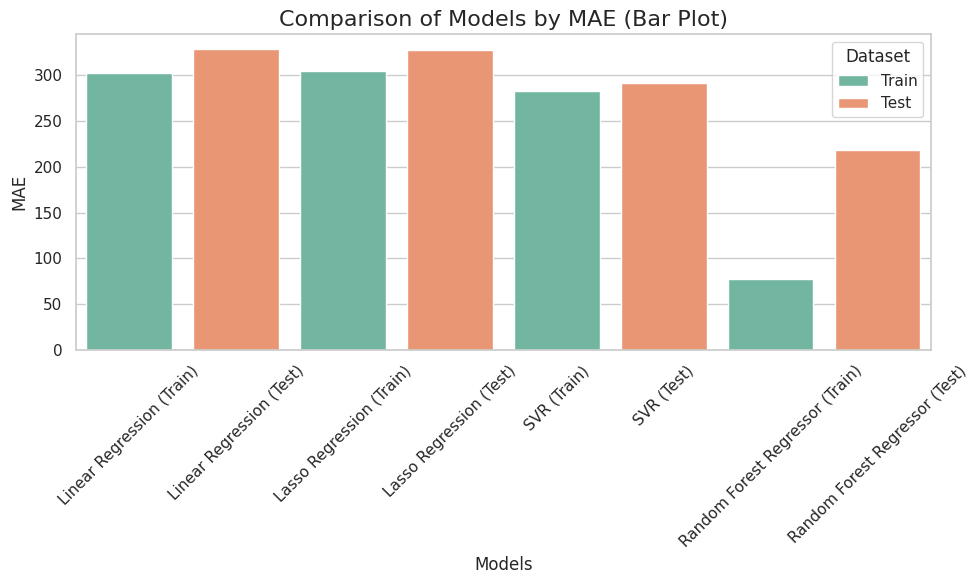

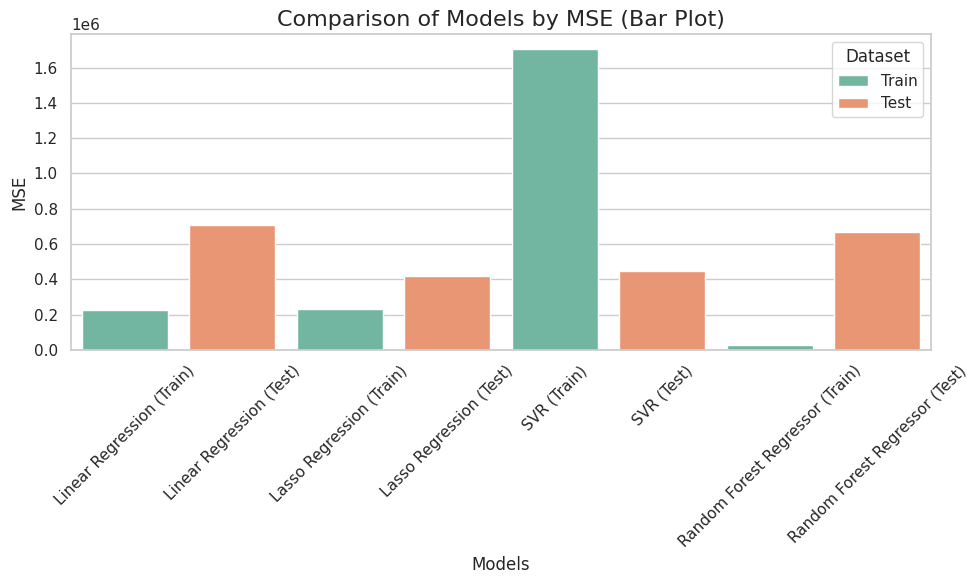

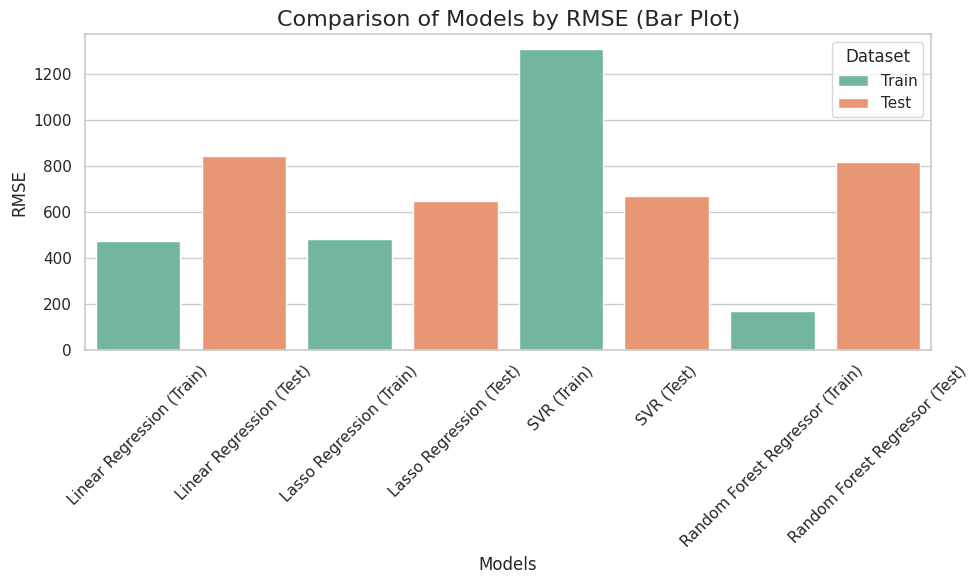

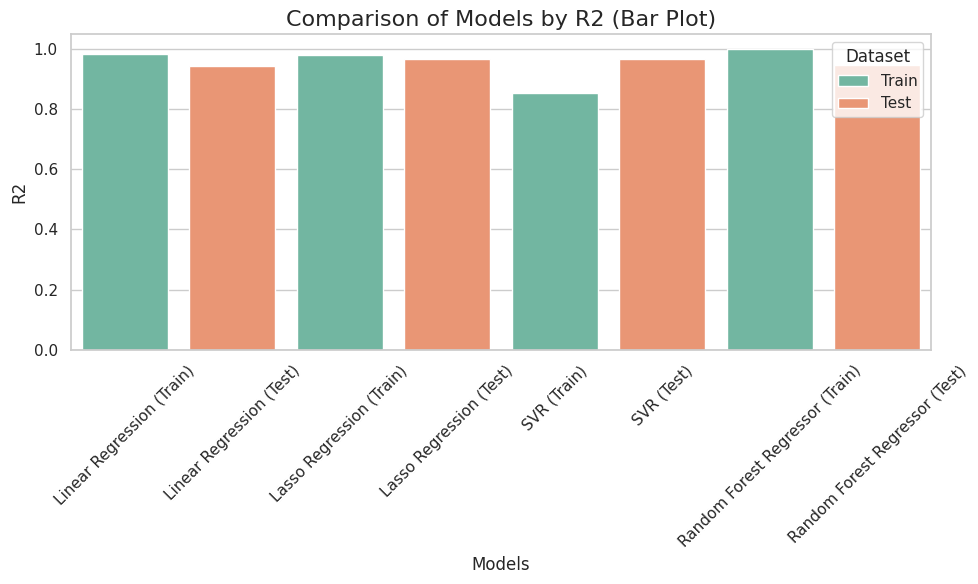

Line Plot:


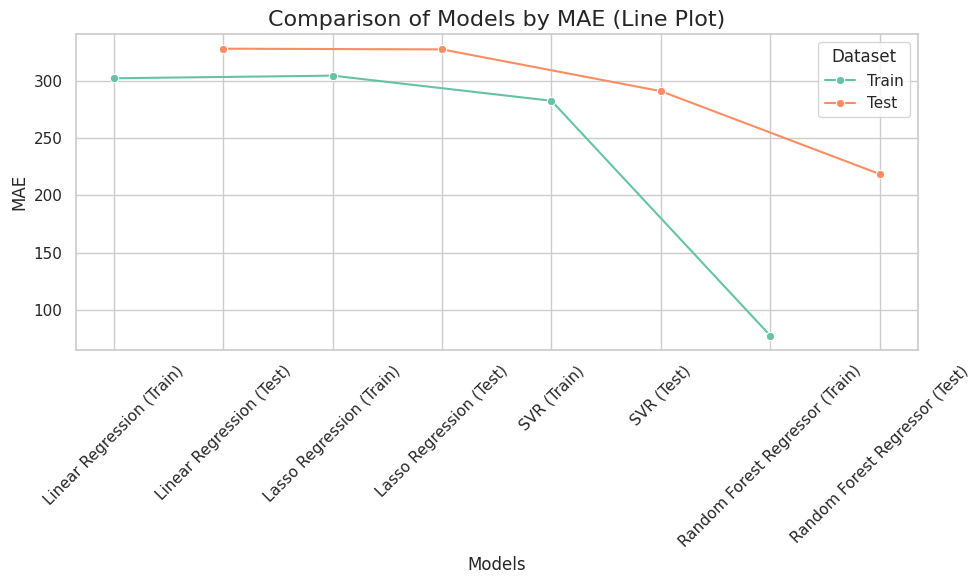

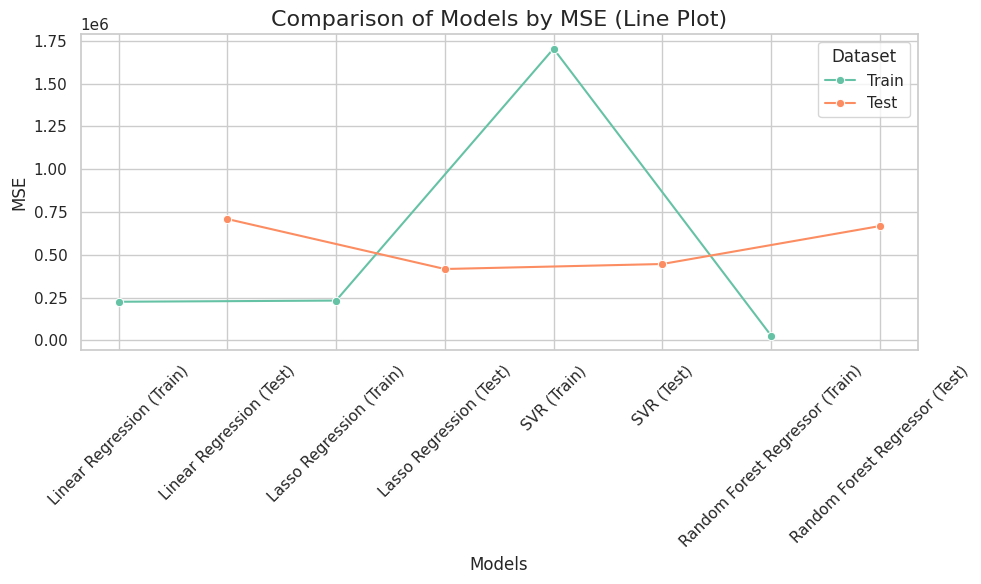

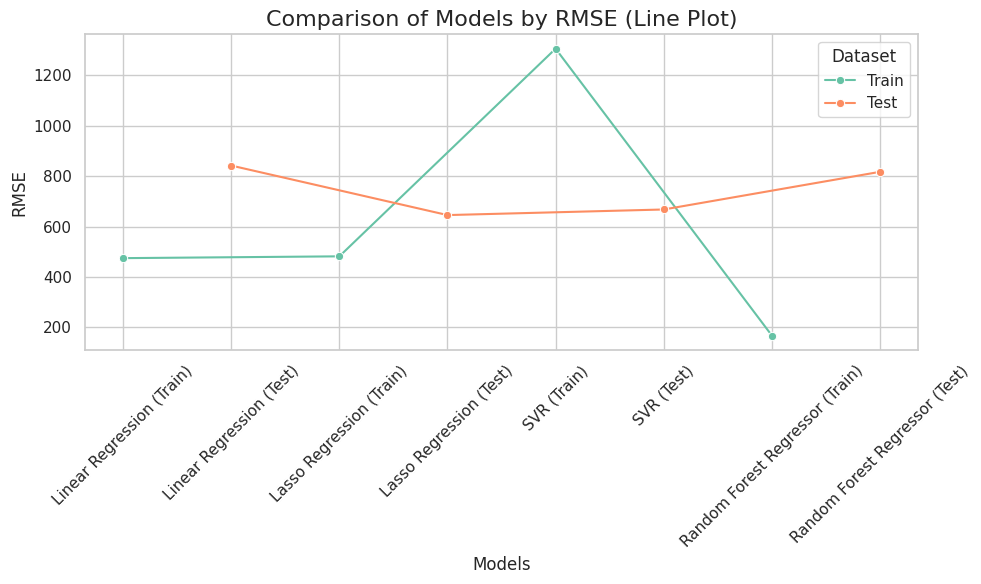

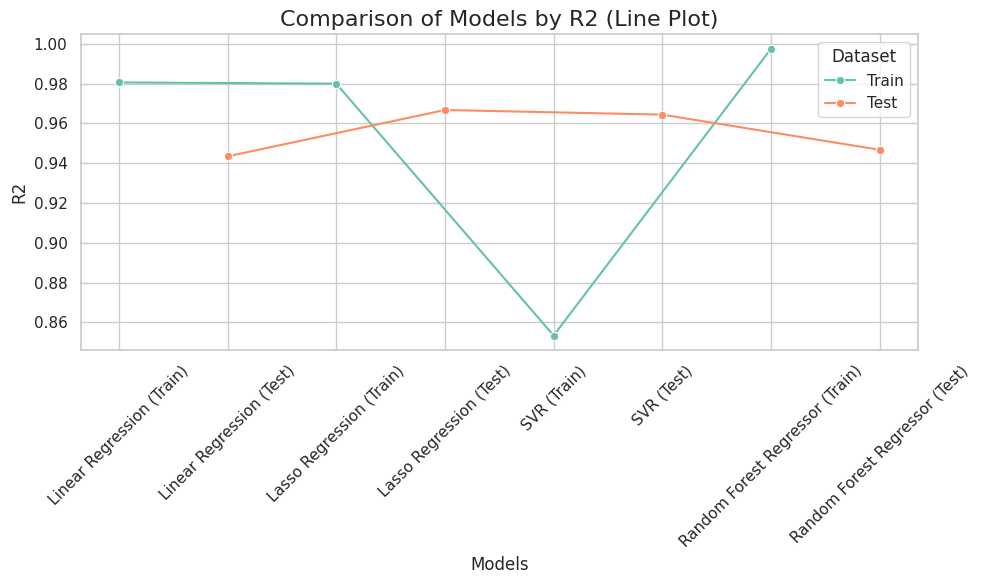

Scatter Plot:


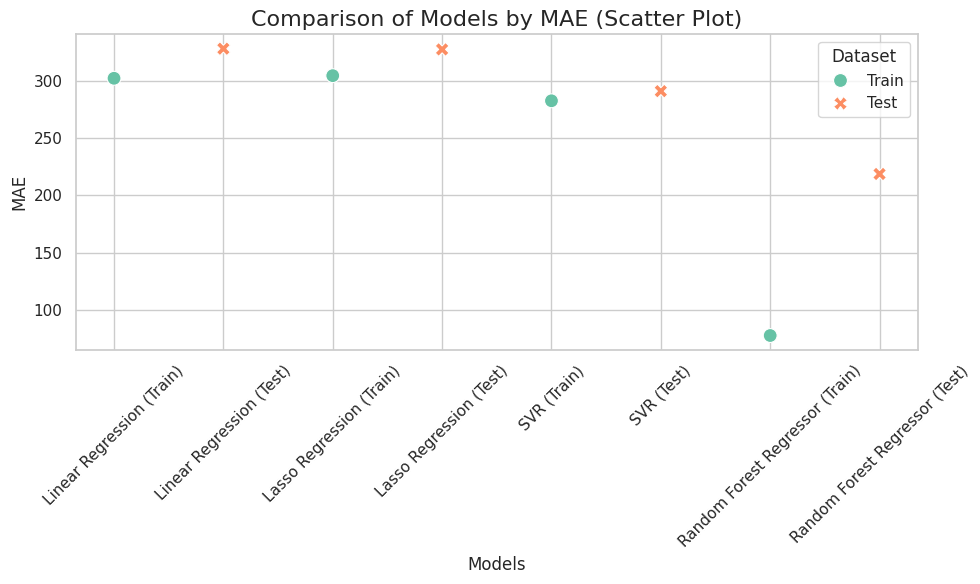

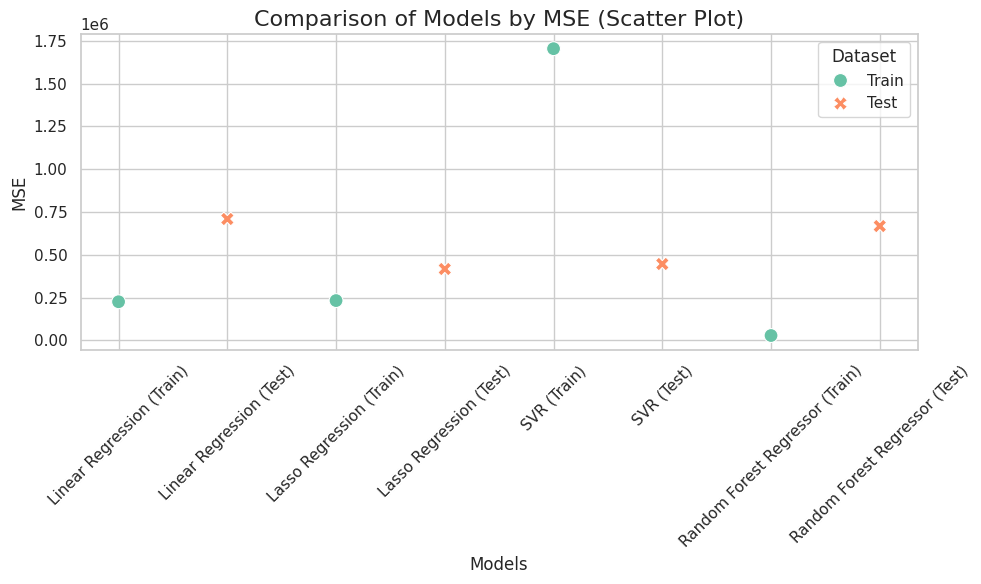

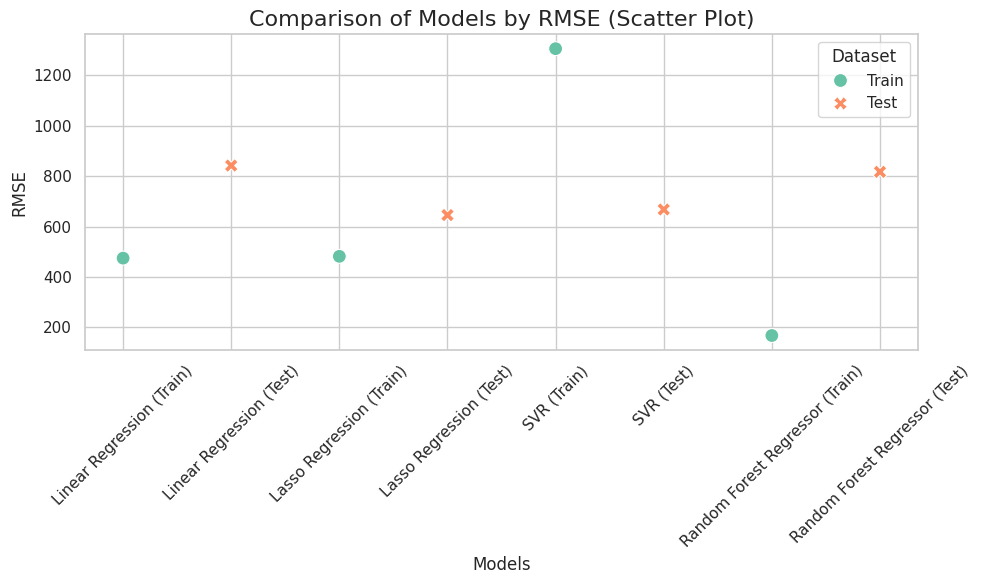

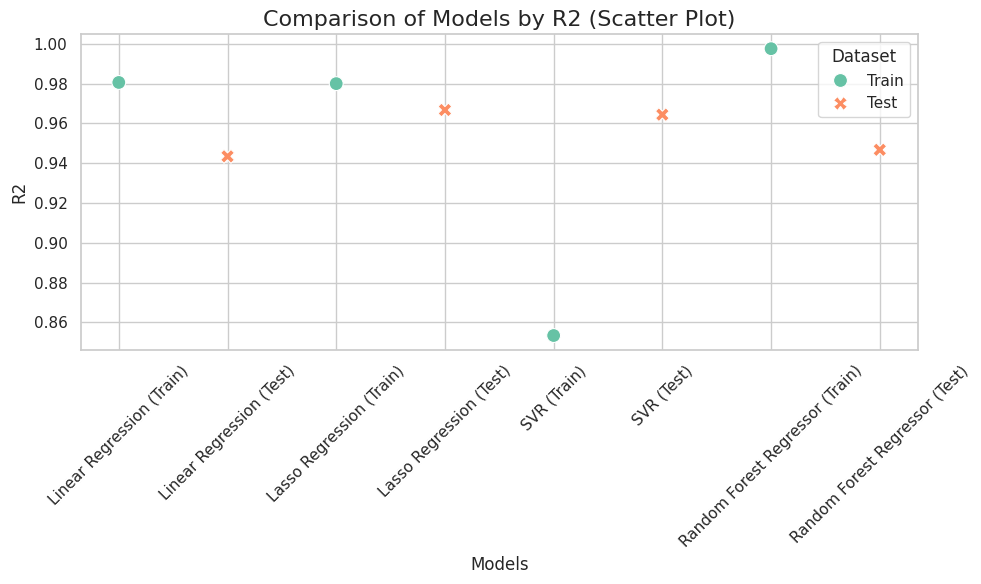

In [48]:
def plot_model_comparison(results, plot_type='bar'):
    """
    Відображення результатів моделей у вигляді графіків.

    Parameters:
    - results: DataFrame, який містить результати моделей (MAE, MSE, RMSE, R2).
    - plot_type: Тип графіка ('bar', 'line', 'scatter').
    """
    # Налаштування стилю
    sns.set(style="whitegrid")

    metrics = ['MAE', 'MSE', 'RMSE', 'R2']
    model_names = results['Model'].unique()

    # Створення графіків для кожної метрики
    for metric in metrics:
        plt.figure(figsize=(10, 6))

        if plot_type == 'bar':
            sns.barplot(data=results, x='Model', y=metric, hue='Dataset', palette='Set2')
            plt.title(f'Comparison of Models by {metric} (Bar Plot)', fontsize=16)
        elif plot_type == 'line':
            sns.lineplot(data=results, x='Model', y=metric, hue='Dataset', marker='o', palette='Set2')
            plt.title(f'Comparison of Models by {metric} (Line Plot)', fontsize=16)
        elif plot_type == 'scatter':
            sns.scatterplot(data=results, x='Model', y=metric, hue='Dataset', style='Dataset', s=100, palette='Set2')
            plt.title(f'Comparison of Models by {metric} (Scatter Plot)', fontsize=16)
        else:
            raise ValueError("Invalid plot_type. Choose from 'bar', 'line', or 'scatter'.")

        plt.ylabel(metric, fontsize=12)
        plt.xlabel('Models', fontsize=12)
        plt.xticks(rotation=45)
        plt.legend(title='Dataset')
        plt.tight_layout()
        plt.show()

results['Dataset'] = ['Train', 'Test'] * 4

# Виклик функції для різних типів графіків
print("Bar Plot:")
plot_model_comparison(results, plot_type='bar')

print("Line Plot:")
plot_model_comparison(results, plot_type='line')

print("Scatter Plot:")
plot_model_comparison(results, plot_type='scatter')

In [39]:
# Створення папки для збереження файлів, якщо вона не існує
output_dir = "saved_models"
os.makedirs(output_dir, exist_ok=True)

# Збереження моделі лінійної регресії
joblib.dump(lin_reg_model, os.path.join(output_dir, "linear_regression_model.pkl"))

# Збереження моделі SVR
joblib.dump(svr_model, os.path.join(output_dir, "svr_model.pkl"))

# Збереження моделі Random Forest
joblib.dump(rf_grid.best_estimator_, os.path.join(output_dir, "random_forest_model.pkl"))

# Збереження моделі Lasso
joblib.dump(lasso_model, os.path.join(output_dir, "lasso_model.pkl"))

# Збереження скалерів
joblib.dump(x_scaler, os.path.join(output_dir, "x_scaler.pkl"))
joblib.dump(y_scaler, os.path.join(output_dir, "y_scaler.pkl"))

print(f"Моделі та скалери збережені в папці: {output_dir}")


In [40]:
# Завантаження всіх файлів з папки
for filename in os.listdir(output_dir):
    files.download(os.path.join(output_dir, filename))

# ***Порівняння та висновки***

***Загальний висновок***

1. Lasso Regression та SVR забезпечують найкраще узагальнення на тестових даних, демонструючи стабільність та точність.

2. Random Forest Regressor має найбільшу точність на
тренувальних даних, але його здатність до узагальнення трохи слабша.

3. Лінійна регресія є базовим підходом із хорошою продуктивністю, але її результати на тестових даних поступаються іншим моделям.

***Вибір моделі залежить від цілей: якщо важлива узагальненість, краще обрати Lasso або SVR; якщо критична точність на тренувальних даних, то Random Forest є найкращим вибором.***

# ***Лінійна Регресія***

***Тренувальні дані***

Модель демонструє чудові результати:

R2=0.9806 — це означає, що модель пояснює 98% варіації залежної змінної, що є дуже сильним показником.

Однак MAE (302.65) та MSE (225,526.7) вказують на наявність певного рівня похибки, хоча ці значення залишаються в межах очікуваного для реальних даних.

RMSE (474.90) також свідчить про досить високу точність, що робить модель надійною для тренувальних даних.

***Тестові дані***

На тестових даних якість моделі знижується:

R2=0.9435 — все ще чудовий результат, але помітно нижчий, ніж на тренувальних даних, що може бути ознакою перенавчання (overfitting).

MAE (328.58) та RMSE (841.88) зростають, що вказує на зниження точності при прогнозуванні нових даних.

***Загальний висновок***

***Модель дуже добре справляється з тренувальними даними, однак зниження точності на тестовому наборі може свідчити про необхідність дооптимізації.***

***Ймовірно, додаткова перевірка моделі з використанням регуляризації (наприклад, Ridge або Lasso) чи пошук інших особливостей даних допоможе зменшити похибки та підвищити здатність до узагальнення.***

***Попри це, результати вказують, що лінійна регресія є надійною моделлю для базового аналізу рентної вартості житла.***

# ***Lasso Regression***



Результати моделі Lasso Regression демонструють загалом хорошу якість передбачень і показують цікаві деталі про її здатність до регуляризації.

***Тренувальні дані***

Модель добре справляється з тренувальними даними:

R2= 0.9800 — трохи нижче, ніж у лінійної регресії, але все ще дуже високий показник. Це свідчить про майже таку саму здатність моделі пояснювати варіативність.

MAE (304.94) та MSE (232,363.3) залишаються в межах очікуваних значень, демонструючи невелику похибку.

RMSE (482.04) свідчить про хорошу здатність моделі працювати з тренувальними даними.

***Тестові дані***

На тестових даних Lasso Regression показує покращені результати в порівнянні з лінійною регресією:

R2=0.9668 — це значно кращий результат, що свідчить про менший ризик перенавчання.

MAE (327.94) та RMSE (645.57) є меншими, ніж у лінійної регресії, що підкреслює перевагу регуляризації в покращенні узагальнення моделі.

***Загальний висновок***

***Модель Lasso Regression демонструє кращі результати узагальнення порівняно з лінійною регресією, особливо на тестових даних. Це підтверджує, що регуляризація допомагає зменшити похибки та знизити ризик перенавчання, роблячи цю модель більш стабільною для нових даних.***



# ***Support Vector Regressor (SVR)***


SVR показує цікаві результати, демонструючи сильну здатність до узагальнення, але з деякими проблемами щодо точності.

***Тренувальні дані***

R2=0.8532 — значно нижчий показник, ніж у регресійних моделей, що свідчить про обмежену здатність моделі пояснювати варіативність.

MAE (282.98) вказує на меншу середню похибку, але MSE (1,706,148) та RMSE (1,306.20) є високими, що свідчить про велику варіативність у помилках моделі.

***Тестові дані***

R2=0.9643 — свідчить про високу здатність моделі узагальнювати. Це схоже на результати Lasso Regression.

MAE (291.51) та RMSE (668.92) залишаються в межах прийнятних значень, але незначно поступаються Lasso.

***Загальний висновок***

***SVR добре справляється з узагальненням даних і демонструє стабільні результати на тестових даних. Проте високі значення MSE і RMSE на тренувальних даних вказують на можливу необхідність дооптимізації гіперпараметрів для покращення загальної точності.***

# ***Random Forest Regressor***



Random Forest демонструє найкращі результати серед усіх моделей, особливо на тренувальних даних.

***Тренувальні дані***

R2=0.9976 — практично ідеальний показник, який вказує на те, що модель дуже добре навчається.

MAE (77.26), MSE (28,282.6) та RMSE (168.17) — значно кращі результати, ніж у інших моделей, свідчать про дуже високу точність.

***Тестові дані***

R2=0.9467 — все ще дуже хороший результат, але трохи поступається іншим моделям, таким як Lasso і SVR.

MAE (218.81) та RMSE (816.99) залишаються кращими, ніж у лінійної регресії, але показують певне зростання похибок на тестових даних.

***Загальний висновок***

***Random Forest демонструє виняткові результати на тренувальних даних, але дещо поступається іншим моделям в узагальненні. Це може свідчити про певний ризик перенавчання, хоча загальні результати все ще залишаються вражаючими.****